In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [5]:
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,213,2,2,72,200,36,36,36.000000,0.000000,100,...,32,0.00000,0.00000,0,0,0.0,0.0000,0,0,NORMAL
1,102324,3,5,433,2279,427,0,144.333333,244.814896,1460,...,20,0.00000,0.00000,0,0,0.0,0.0000,0,0,NORMAL
2,60087781,18,20,1186,23827,517,0,65.888889,152.396885,4380,...,20,45151.66667,53038.89696,153416,23214,9969478.0,102321.2423,10000000,9767042,NORMAL
3,47472,1,1,51,67,51,51,51.000000,0.000000,67,...,20,0.00000,0.00000,0,0,0.0,0.0000,0,0,NORMAL
4,47596,1,1,46,110,46,46,46.000000,0.000000,110,...,40,0.00000,0.00000,0,0,0.0,0.0000,0,0,NORMAL


<Axes: xlabel='Label'>

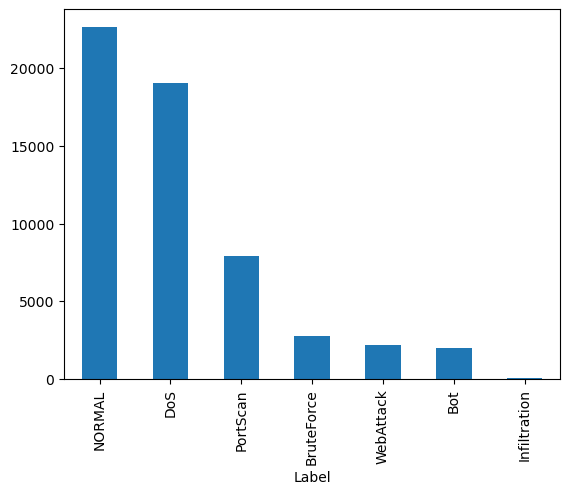

In [7]:
dataset.Label.value_counts().plot(kind = 'bar')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56589 entries, 0 to 56588
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56589 non-null  int64  
 1   Total Fwd Packets            56589 non-null  int64  
 2   Total Backward Packets       56589 non-null  int64  
 3   Total Length of Fwd Packets  56589 non-null  int64  
 4   Total Length of Bwd Packets  56589 non-null  int64  
 5   Fwd Packet Length Max        56589 non-null  int64  
 6   Fwd Packet Length Min        56589 non-null  int64  
 7   Fwd Packet Length Mean       56589 non-null  float64
 8   Fwd Packet Length Std        56589 non-null  float64
 9   Bwd Packet Length Max        56589 non-null  int64  
 10  Bwd Packet Length Min        56589 non-null  int64  
 11  Bwd Packet Length Mean       56589 non-null  float64
 12  Bwd Packet Length Std        56589 non-null  float64
 13  Flow Bytes/s    

In [11]:
dataset.shape

(56589, 78)

In [13]:
dataset.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

In [15]:
dataset.dropna(inplace = True)

In [17]:
## separating Features and Labels

X = dataset.drop('Label', axis = 1)
y = dataset.Label

print(X)
print(y)

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                213                  2                       2   
1             102324                  3                       5   
2           60087781                 18                      20   
3              47472                  1                       1   
4              47596                  1                       1   
...              ...                ...                     ...   
56584            234                  2                       2   
56585         133288                  2                       2   
56586       11507694                  5                       4   
56587       11507707                  8                       6   
56588       11512204                  8                       5   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                               72                          200   
1                              433                         22

In [19]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(X)

In [25]:
X

array([[-0.52909712, -0.06843309, -0.05176019, ..., -0.13780814,
        -0.4669916 , -0.44256327],
       [-0.52631862, -0.05087702, -0.00670496, ..., -0.13780814,
        -0.4669916 , -0.44256327],
       [ 1.10591664,  0.21246391,  0.21857122, ..., -0.12161438,
        -0.16435239, -0.13675663],
       ...,
       [-0.21597261, -0.0157649 , -0.02172337, ..., -0.13780814,
        -0.27016596, -0.23893393],
       [-0.21597226,  0.03690329,  0.00831346, ..., -0.13780814,
        -0.27018163, -0.23895015],
       [-0.2158499 ,  0.03690329, -0.00670496, ..., -0.13780814,
        -0.27005831, -0.23882256]])

# Manual standardization of features

In [28]:
# Manual standardization of features
#X = (X - X.mean(axis=0)) / X.std(axis=0)

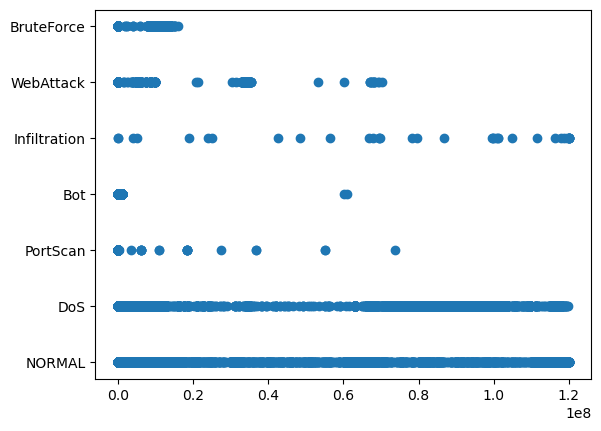

In [30]:
plt.scatter(dataset['Flow Duration'],y)

In [32]:
## Data transformation and features selection
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [34]:
y = labelencoder.fit_transform(y)
print(y)

[4 4 4 ... 2 2 2]


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((45228, 77), (11307, 77), (45228,), (11307,))

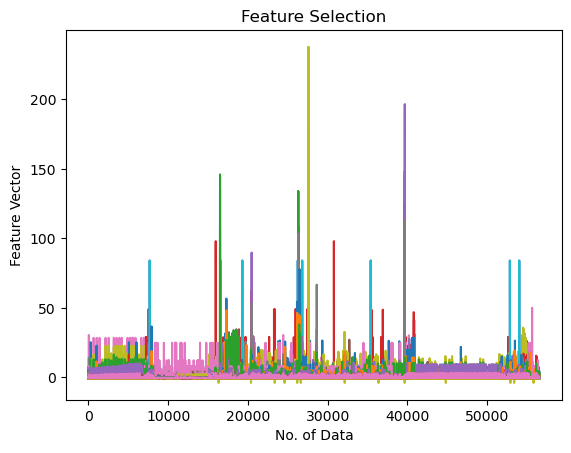

In [38]:
# Data Transformation and Feature Selection

plt.plot(X)
plt.xlabel("No. of Data")
plt.ylabel("Feature Vector")
plt.title("Feature Selection")
plt.show()

In [40]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
Resr=[]

=====XGBoost Classifier-Prediction Result=========
['Infiltration', 'Infiltration', 'BruteForce', 'PortScan', 'Bot', 'Infiltration', 'Infiltration', 'Bot', 'BruteForce', 'Infiltration', 'BruteForce', 'BruteForce', 'PortScan', 'Bot', 'Infiltration', 'PortScan', 'PortScan', 'PortScan', 'Infiltration', 'BruteForce', 'BruteForce', 'PortScan', 'BruteForce', 'Infiltration', 'PortScan', 'BruteForce', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'WebAttack', 'BruteForce', 'Bot', 'Infiltration', 'Infiltration', 'PortScan', 'BruteForce', 'BruteForce', 'PortScan', 'PortScan', 'BruteForce', 'PortScan', 'BruteForce', 'PortScan', 'Infiltration', 'PortScan', 'Bot', 'PortScan', 'BruteForce', 'PortScan', 'Infiltration', 'Bot', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'PortScan', 'WebAttack', 'BruteForce', 'BruteForce', 'BruteForce', 'PortScan', 'BruteForce', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltrat

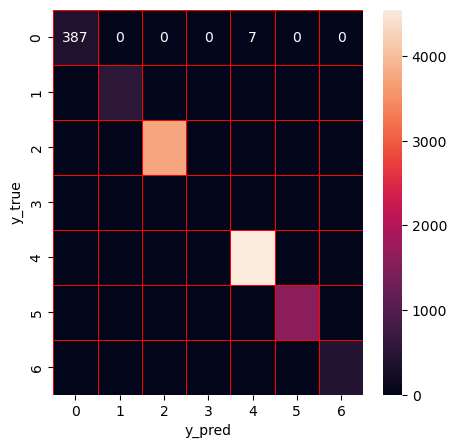

In [44]:
print('=====XGBoost Classifier-Prediction Result=========')
for ii in range(0,len(y_predict)):
    if(y_predict[ii]==0):
        Resr.append("Normal")
    elif(y_predict[ii]==1):
        Resr.append("Bot")
    elif(y_predict[ii]==2):
        Resr.append("BruteForce")
    elif(y_predict[ii]==3):
        Resr.append("DoS")
    elif(y_predict[ii]==4):
        Resr.append("Infiltration")
    elif(y_predict[ii]==5):
        Resr.append("PortScan")
    elif(y_predict[ii]==6):
        Resr.append("WebAttack")
print(Resr)
y_true=y_test
Resr1=[]
print('=====Test Label=========')
for ii in range(0,len(y_true)):
    if(y_true[ii]==0):
        Resr1.append("Normal")
    elif(y_true[ii]==1):
        Resr1.append("Bot")
    elif(y_true[ii]==2):
        Resr1.append("BruteForce")
    elif(y_true[ii]==3):
        Resr1.append("DoS")
    elif(y_true[ii]==4):
        Resr1.append("Infiltration")
    elif(y_true[ii]==5):
        Resr1.append("PortScan")
    elif(y_true[ii]==6):
        Resr1.append("WebAttack")
print(Resr1)
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
y_predict

array([4, 4, 2, ..., 2, 2, 5], dtype=int64)

In [48]:
# Printing the mapping of original values to encoded values
print("\nMapping of Original Values to Encoded Values:")
mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
for original, encoded in mapping.items():
    print(f"{original}: {encoded}")


Mapping of Original Values to Encoded Values:
Bot: 0
BruteForce: 1
DoS: 2
Infiltration: 3
NORMAL: 4
PortScan: 5
WebAttack: 6


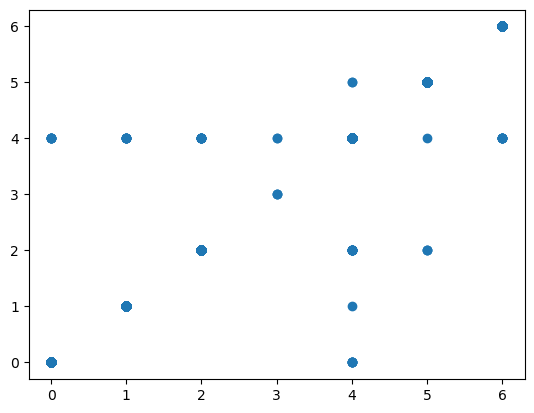

In [50]:
## Plot a scatter for the prediction

plt.scatter(y_test,y_predict)

NEW DATA PREDICTION

In [202]:
X1 = dataset.iloc[32578,:-1]

In [204]:
#X1 = (X1 - X1.mean(axis=0)) / X1.std(axis=0)
input_data = X1

In [206]:
dataset.iloc[32578]

Flow Duration                           4
Total Fwd Packets                       2
Total Backward Packets                  0
Total Length of Fwd Packets            14
Total Length of Bwd Packets             0
                                  ...    
Idle Mean                             0.0
Idle Std                              0.0
Idle Max                                0
Idle Min                                0
Label                          BruteForce
Name: 32580, Length: 78, dtype: object

In [208]:
input_data_np = np.asarray(input_data)
input_data_reshaped = scaler.transform(input_data_np.reshape(1,-1))

In [210]:
prediction = xg.predict(input_data_reshaped)

In [212]:
print(prediction)

[1]


## PICKLING THE MODEL FILE FOR DEPLOYMENT

In [215]:
import pickle

In [217]:
pickle.dump(prediction,open('ditectionmodel.pk1','wb'))

In [219]:
ditected_model = pickle.load(open('ditectionmodel.pk1','rb'))

In [221]:
ditected_model

array([1], dtype=int64)